In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf

In [11]:
sess = tf.Session()
x_vals = tf.linspace(-1.,1.,500)
target = tf.constant(0.)

#L2正则损失函数
l2_y_vals = tf.square(target - x_vals)
l2_y_out = sess.run(l2_y_vals)
#L1正则损失函数
l1_y_vals = tf.abs(target - x_vals)
l1_y_out = sess.run(l1_y_vals)
#Pseudo-Huber损失函数
delta1 = tf.constant(0.25)
phuber1_y_vals = tf.multiply(tf.square(delta1),tf.sqrt(1. + tf.square((target - x_vals) / delta1)) - 1.)
phuber1_y_out = sess.run(phuber1_y_vals)

delta2 = tf.constant(5.)
phuber2_y_vals = tf.multiply(tf.square(delta2),tf.sqrt(1. + tf.square((target - x_vals) / delta2)) - 1.)
phuber2_y_out = sess.run(phuber2_y_vals)
#重新赋值
x_vals = tf.linspace(-3.,5.,500)
target = tf.constant(1.)
targets = tf.fill([500,],1.)
#Hinge损失函数
hinge_y_vals = tf.maximum(0.,1. - tf.multiply(target,x_vals))
hinge_y_out = sess.run(hinge_y_vals)
#两类交叉熵损失函数
xentropy_y_vals = -tf.multiply(target,tf.log(x_vals)) - tf.multiply((1. - target),tf.log(1. - x_vals))
xentropy_y_out = sess.run(xentropy_y_vals)
#sigmoid交叉熵损失函数
xentropy_sigmoid_y_vals = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets,logits=x_vals)
xentropy_sigmoid_y_out = sess.run(xentropy_sigmoid_y_vals)
#加权交叉熵损失函数
weight = tf.constant(0.5)
xentropy_weighted_y_vals = tf.nn.weighted_cross_entropy_with_logits(x_vals,targets,weight)
xentropy_weighted_y_out = sess.run(xentropy_weighted_y_vals)
#Softmax交叉熵损失函数
unscaled_logits = tf.constant([[1.,-3.,10.]])
target_dist = tf.constant([[0.1,0.02,0.88]])
softmax_xentropy = tf.nn.softmax_cross_entropy_with_logits(labels=target_dist,logits=unscaled_logits)
print(sess.run(softmax_xentropy))
#稀疏Softmax交叉熵损失函数
unscaled_logits = tf.constant([[1.,-3.,10.]])
sparse_target_dist = tf.constant([2])
sparse_xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=sparse_target_dist,logits=unscaled_logits)
print(sess.run(sparse_xentropy))

[1.1601256]
[0.00012564]


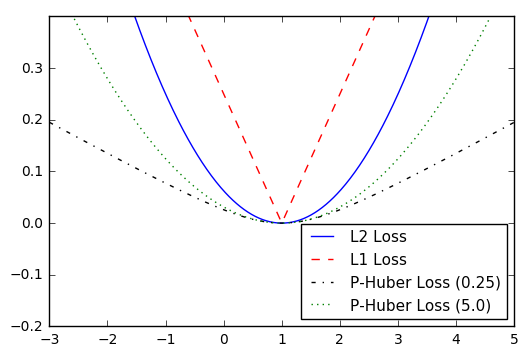

In [12]:
#绘制回归算法的损失函数
x_array = sess.run(x_vals)
plt.plot(x_array, l2_y_out, 'b-', label='L2 Loss')
plt.plot(x_array, l1_y_out, 'r--', label='L1 Loss')
plt.plot(x_array, phuber1_y_out, 'k-.', label='P-Huber Loss (0.25)')
plt.plot(x_array, phuber2_y_out, 'g:', label='P-Huber Loss (5.0)')
plt.ylim(-0.2,0.4)
plt.legend(loc='lower right', prop={'size':11})
plt.show()

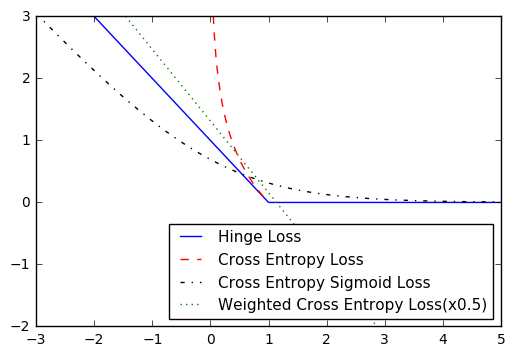

In [17]:
#绘制各种分类算法损失函数
x_array = sess.run(x_vals)
plt.plot(x_array, hinge_y_out, 'b-', label='Hinge Loss')
plt.plot(x_array, xentropy_y_out, 'r--', label='Cross Entropy Loss')
plt.plot(x_array, xentropy_sigmoid_y_out, 'k-.', label='Cross Entropy Sigmoid Loss')
plt.plot(x_array, xentropy_weighted_y_out, 'g:', label='Weighted Cross Entropy Loss(x0.5)')
plt.ylim(-2,3)
plt.legend(loc='lower right', prop={'size':11})
plt.show()